In [0]:
import os
from PIL import Image

def grayscale_func(directory):
  for filename in os.listdir(directory):
      if filename.endswith(".bmp"):
          print(os.path.join(directory, filename))
          img = Image.open(os.path.join(directory, filename)).convert('L')
          extension = os.path.splitext(filename)[0]
          extension = extension + '.png'
          print(extension)
          img.save(os.path.join('grayscale_dataset', extension))
          continue
      else:
          continue

grayscale_func('A00_v2')
grayscale_func('A01_v2')
grayscale_func('A02_v2')
grayscale_func('A03_v2')


In [0]:
from PIL import Image 
import numpy as np
import cv2 as cv
import sys
from operator import itemgetter
def findCellsFromImage(image):
  sys.setrecursionlimit(10000)
  img = Image.open(image)
  width , height = img.size
  visited_arr = np.zeros((height,width),np.uint8)
  img_arr = np.array(img,dtype=np.uint8)
  coordinatesForEachCell = []
  for y in range(0,height):
    for x in range(0,width):
      if(img_arr[y][x] == 255 and visited_arr[y][x] == 0):
        emptyTupleArray = []
        visited_arr[y][x] = 1
        emptyTupleArray.append((y,x))
        startJournal(y,x,visited_arr,img_arr,emptyTupleArray)
        coordinatesForEachCell.append(emptyTupleArray)

  return(coordinatesForEachCell)

def startJournal(currentY,currentX,visited_arr,img_arr,emptyTupleArray):
  
  if(currentX+1<len(img_arr[0])):
    if(img_arr[currentY][currentX+1] == 255 and visited_arr[currentY][currentX+1] == 0):
      emptyTupleArray.append((currentY,currentX+1))
      visited_arr[currentY][currentX+1] = 1
      startJournal(currentY,currentX+1,visited_arr,img_arr,emptyTupleArray)
  if(currentY+1<len(img_arr)):
    if(img_arr[currentY+1][currentX] == 255 and visited_arr[currentY+1][currentX] == 0):
      emptyTupleArray.append((currentY+1,currentX))
      visited_arr[currentY+1][currentX] = 1
      startJournal(currentY+1,currentX,visited_arr,img_arr,emptyTupleArray)
  if(currentY-1>0):
    if(img_arr[currentY-1][currentX] == 255 and visited_arr[currentY-1][currentX] == 0):
      emptyTupleArray.append((currentY-1,currentX))
      visited_arr[currentY-1][currentX] = 1
      startJournal(currentY-1,currentX,visited_arr,img_arr,emptyTupleArray)
  if(currentX-1>0):
    if(img_arr[currentY][currentX-1] == 255 and visited_arr[currentY][currentX-1] == 0):
      emptyTupleArray.append((currentY,currentX-1))
      visited_arr[currentY][currentX-1] = 1
      startJournal(currentY,currentX-1,visited_arr,img_arr,emptyTupleArray)
  if(currentY+1<len(img_arr) and currentX+1<len(img_arr[0] )):
    if(img_arr[currentY+1][currentX+1] == 255 and visited_arr[currentY+1][currentX+1] == 0):
      emptyTupleArray.append((currentY+1,currentX+1))
      visited_arr[currentY+1][currentX+1] = 1
      startJournal(currentY+1,currentX+1,visited_arr,img_arr,emptyTupleArray)
  if(currentY+1<len(img_arr) and currentX-1>0):
    if(img_arr[currentY+1][currentX-1] == 255 and visited_arr[currentY+1][currentX-1] == 0):
      emptyTupleArray.append((currentY+1,currentX-1))
      visited_arr[currentY+1][currentX-1] = 1
      startJournal(currentY+1,currentX-1,visited_arr,img_arr,emptyTupleArray)
  if(currentY-1>0 and currentX-1>0):
    if(img_arr[currentY-1][currentX-1] == 255 and visited_arr[currentY-1][currentX-1] == 0):
      emptyTupleArray.append((currentY-1,currentX-1))
      visited_arr[currentY-1][currentX-1] = 1
      startJournal(currentY-1,currentX-1,visited_arr,img_arr,emptyTupleArray)
  if(currentY-1>0 and currentX+1<len(img_arr[0] )):
    if(img_arr[currentY-1][currentX+1] == 255 and visited_arr[currentY-1][currentX+1] == 0):
      emptyTupleArray.append((currentY-1,currentX+1))
      visited_arr[currentY-1][currentX+1] = 1
      startJournal(currentY-1,currentX+1,visited_arr,img_arr,emptyTupleArray)
      

def cropImage(image):
  img = cv.imread(image)
  a = findCellsFromImage(image)
  b = a
  a = sorted(a[0])
  b = sorted(b[0],key=itemgetter(1))
  minX = b[0][1]
  maxX = b[len(b)-1][1]
  minY = a[0][0]
  maxY = a[len(a)-1][0]
  print("Minimum Y : %s" % minY) 
  print("Minimum X : %s" % minX) 
  print("Maksimum Y : %s" % maxY) 
  print("Maksimum X : %s" % maxX)
  
  crop_img = img[0:50, 0:50]
  cv.imshow("cropped", crop_img)
  cv.waitKey(0)
cropImage('A00_00-pre.bmp')


Found 170 images belonging to 2 classes.
Found 1541 images belonging to 2 classes.
Epoch 1/6
5/5 [==============================] - 506s 101s/step - loss: 0.6664 - acc: 0.8000 - val_loss: 0.7589 - val_acc: 0.0241
Epoch 2/6
5/5 [==============================] - 21s 4s/step - loss: 0.6036 - acc: 1.0000 - val_loss: 0.8344 - val_acc: 0.0066
Epoch 3/6
5/5 [==============================] - 17s 3s/step - loss: 0.5432 - acc: 1.0000 - val_loss: 0.9129 - val_acc: 0.0245
Epoch 4/6
5/5 [==============================] - 17s 3s/step - loss: 0.4804 - acc: 1.0000 - val_loss: 1.0171 - val_acc: 0.0278
Epoch 5/6
5/5 [==============================] - 18s 4s/step - loss: 0.4108 - acc: 1.0000 - val_loss: 1.1700 - val_acc: 0.0278
Epoch 6/6
5/5 [==============================] - 18s 4s/step - loss: 0.3267 - acc: 1.0000 - val_loss: 1.4324 - val_acc: 0.0278


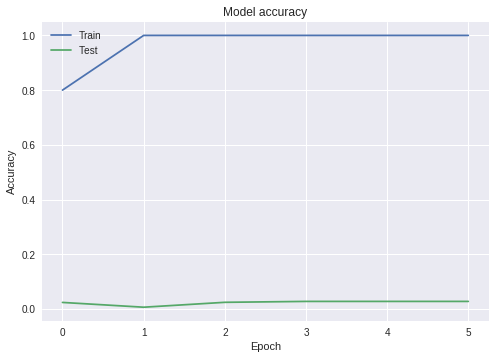

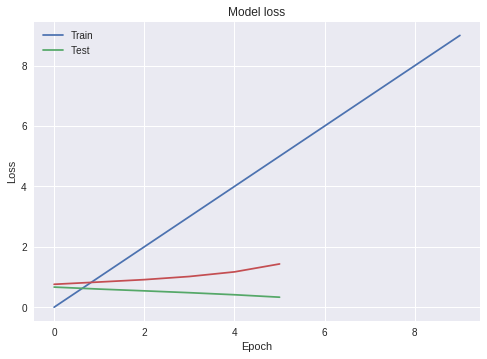

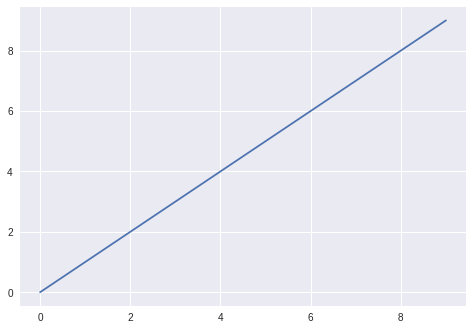

In [0]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.optimizers import SGD
from keras import backend as K
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import roc_auc_score
import keras


train_datagen = ImageDataGenerator(
    rescale = 1./255) # randomly flipping half of the images horizontally

validation_datagen = ImageDataGenerator(rescale = 1./255)
print(train_datagen)

# generator for reading train data from folder
train_generator = train_datagen.flow_from_directory(
    'train',
    target_size = (224, 224),
    color_mode = 'rgb',
    batch_size = 32,
    shuffle = True,
    class_mode = 'categorical')

# generator for reading validation data from folder
validation_generator = validation_datagen.flow_from_directory(
    'validation',
    target_size = (224, 224),
    color_mode = 'rgb',
    batch_size = 32,
    shuffle = False,
    class_mode = 'categorical')

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
sgd = keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
model = VGG16(weights=None, include_top=True , classes = 2)


model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

history = model.fit_generator(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs =6,
                    validation_steps = STEP_SIZE_VALID,
                    validation_data = validation_generator)

model.save('sontest.h5')
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
fig = plt.figure()
plt.plot(range(10))
fig.savefig('acc.png', dpi=fig.dpi)

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
fig = plt.figure()
plt.plot(range(10))
fig.savefig('loss.png', dpi=fig.dpi)



# HW1-Q2


In [0]:
import cv2 as cv
import numpy as np
from PIL import Image
import sys
def removeArtifactsAndCountingComponents(image):
  
  img = cv.imread(image,0)
  kernel = np.ones((5,5),np.uint8)
  opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
  countingComponents(opening)
  img_tmp = img
  width = len(img[0])
  height = len(img)
  for y in range(0,height):
    for x in range(0,width):
  	  zeroFound = False
      tempY = y-2
  	  tempX = x-2

		  for inner_y in range(0,5):
		    for inner_x in range(0,5):
		  	  if(tempY>=0 and tempX >=0 and tempY<height-1 and tempX<width-1):
		  		  if(tempY == y and tempX == x ):
		  			  pass
		  		  if(img[tempY][tempX] == 0):
		  			  zeroFound = True

	  		  if(inner_x == 4):
	  			  tempY = tempY + 1

	  		  tempX = tempX + 1

	  if(zeroFound == False):
	    img_tmp[y][x] = 255
	  else:
	    img_tmp[y][x] = 0

def countingComponents(image):
  height = len(image)
  width = len(image[0])
  labels = np.zeros((height,width),np.uint16)
  current_label = 1
  equalitySets = []
  for y in range(0,height):

    for x in range(0,width):
      min_label = sys.maxsize
      northWest = 0
      north = 0
      northEast = 0
      west = 0
      tempSet = set()
      if(image[y][x] == 255):
        if(y>0 and x>0):
          northWest = labels[y-1][x-1]
        if(x>0):
          west = labels[y][x-1]
        if(y>0):
          north = labels[y-1][x]
        if(y>0 and x<width-1):
          northEast = labels[y-1][x+1]
        if(northWest != 0):
          min_label = northWest
        if(north != 0 and north<min_label):
          min_label = north
        if(northEast!= 0 and northEast<min_label):
          min_label = northEast
        if(west!= 0 and west<min_label):
          min_label = west

        if(min_label == sys.maxsize):
          labels[y][x] = current_label
          current_label = current_label + 1
        else:
          found = 0
          temp = []
          values = []
          labels[y][x] = min_label
          tempSet.add(northWest)
          tempSet.add(north)
          tempSet.add(northEast)
          tempSet.add(west)
          tempSet.discard(0)
          tempSet = list(tempSet)
          for items in equalitySets:
            for element in tempSet:
              if(element in items):
                temp.append(items)
                equalitySets.remove(items)
                found = 1
                break
          
          if(found == 1):
            for item in temp:
              for i in item:
                values.append(i)
            values = set(values)
            equalitySets.append(values)   
          else:
            equalitySets.append(tempSet)
  
            
  print("Connected components were counted after removing articats :  %s" % (len(equalitySets)))         
  new_image = Image.fromarray(image)
  new_image.save('part3_result.png')     
      
        
removeArtifactsAndCountingComponents("abdomen.png")

In [1]:
from google.colab import drive
drive.mount('/content/drive/')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
cd drive/My Drive/app/dataset

/content/drive/My Drive/app/dataset


In [0]:
ls

In [0]:
import os
from PIL import Image
from numpy  import array
import cv2 as cv
import numpy as np
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

def function():
  print("start iterate")
  onlyfiles0 = [f for f in os.listdir('train_dataset/0') if os.path.isfile(os.path.join('train_dataset/0', f))]
  onlyfiles1 = [f for f in os.listdir('train_dataset/1') if os.path.isfile(os.path.join('train_dataset/1', f))]
  print("end iterate")
  image_width = 256
  image_height = 256
  channels = 3
  onlyfiles0 = onlyfiles0[0:500]
  onlyfiles1 = onlyfiles1[0:100]
  print(len(onlyfiles0))
  print(len(onlyfiles1))
  dataset = np.ndarray(shape=(600, image_height, image_width,channels),
                       dtype=np.float32)
  labels = [] 
  i = 0
  for _file in onlyfiles0:
      img = load_img('train_dataset/0'+ "/" + _file)  # this is a PIL image
      # Convert to Numpy Array
      x = img_to_array(img)  
      # Normalize
      dataset[i] = x
      i += 1
      labels.append(0)
      if i % 100 == 0:
          print("%d images to array" % i)
  print("All images to array!")
 
  for _file in onlyfiles1:
      img = load_img('train_dataset/1'+ "/" + _file)  # this is a PIL image
      # Convert to Numpy Array
      x = img_to_array(img)  
      # Normalize
      dataset[i] = x
      i += 1
      labels.append(1)
      if i % 20 == 0:
          print("%d images to array" % i)
  print("All images to array!")
  labels = array(labels)
  print(dataset.shape)
  return (dataset,labels)


def function2():
  print("start iterate")
  onlyfiles0 = [f for f in os.listdir('validation0') if os.path.isfile(os.path.join('validation0', f))]
  onlyfiles1 = [f for f in os.listdir('validation1') if os.path.isfile(os.path.join('validation1', f))]
  print("end iterate")
  image_width = 256
  image_height = 256
  channels = 3
  onlyfiles0 = onlyfiles0[0:50]
  onlyfiles1 = onlyfiles1[0:10]
  print(len(onlyfiles0))
  print(len(onlyfiles1))
  dataset = np.ndarray(shape=(60, image_height, image_width,channels),
                       dtype=np.float32)
  labels = [] 
  i = 0
  for _file in onlyfiles0:
      img = load_img('validation0'+ "/" + _file)  # this is a PIL image
      # Convert to Numpy Array
      x = img_to_array(img)  
      # Normalize
      dataset[i] = x
      i += 1
      labels.append(0)
      if i % 100 == 0:
          print("%d images to array" % i)
  print("All images to array!")
 
  for _file in onlyfiles1:
      img = load_img('validation1'+ "/" + _file)  # this is a PIL image
      # Convert to Numpy Array
      x = img_to_array(img)  
      # Normalize
      dataset[i] = x
      i += 1
      labels.append(1)
      if i % 20 == 0:
          print("%d images to array" % i)
  print("All images to array!")
  labels = array(labels)
  print(dataset.shape)
  return (dataset,labels)
  



In [0]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.optimizers import SGD
from keras import backend as K
from keras.applications.vgg16 import VGG16
import keras_metrics
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import roc_auc_score
import keras


train_datagen = ImageDataGenerator(
    rescale = 1./255) # randomly flipping half of the images horizontally

validation_datagen = ImageDataGenerator(rescale = 1./255)
print(train_datagen)

# generator for reading train data from folder
train_generator = train_datagen.flow_from_directory(
    'train',
    target_size = (224, 224),
    color_mode = 'rgb',
    batch_size = 32,
    shuffle = True,
    class_mode = 'categorical')

# generator for reading validation data from folder
validation_generator = validation_datagen.flow_from_directory(
    'validation',
    target_size = (224, 224),
    color_mode = 'rgb',
    batch_size = 32,
    shuffle = True,
    class_mode = 'categorical')

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
sgd = keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
model = VGG16(weights=None, include_top=True , classes = 2)

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=[keras_metrics.precision(), keras_metrics.f1_score() ,keras_metrics.recall(),keras_metrics.true_positive(),
                       keras_metrics.true_negative(),keras_metrics.false_negative(),keras_metrics.false_positive()])

model.fit_generator(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs = 20,
                    validation_steps = STEP_SIZE_VALID,
                    validation_data = validation_generator)

model.save('my_model3.h5')

Found 10875 images belonging to 2 classes.
Found 1541 images belonging to 2 classes.
Epoch 1/20
339/339 [==============================] - 3895s 11s/step - loss: 0.6144 - precision: 0.6833 - f1_score: 0.0237 - recall: 0.0121 - true_positive: 41.0000 - true_negative: 7435.0000 - false_negative: 3353.0000 - false_positive: 19.0000 - val_loss: 0.1983 - val_precision: 0.0000e+00 - val_f1_score: 0.0000e+00 - val_recall: 0.0000e+00 - val_true_positive: 0.0000e+00 - val_true_negative: 1494.0000 - val_false_negative: 42.0000 - val_false_positive: 0.0000e+00
Epoch 2/20
339/339 [==============================] - 313s 922ms/step - loss: 0.3679 - precision: 0.7902 - f1_score: 0.7192 - recall: 0.6599 - true_positive: 2233.0000 - true_negative: 6866.0000 - false_negative: 1151.0000 - false_positive: 593.0000 - val_loss: 0.2826 - val_precision: 0.1813 - val_f1_score: 0.3004 - val_recall: 0.8750 - val_true_positive: 35.0000 - val_true_negative: 1311.0000 - val_false_negative: 5.0000 - val_false_positi

In [0]:
!pip3 install keras_metrics

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense , Activation , BatchNormalization
class AlexNet:
    @staticmethod
    def build(width, height, depth, classes):
        model = Sequential()
        # 1st Convolutional Layer
        model.add(Conv2D(filters=96, input_shape=(width,height,depth), kernel_size=(11,11),\
         strides=(4,4), padding='valid'))
        model.add(Activation('relu'))
        # Pooling 
        model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
        # Batch Normalisation before passing it to the next layer
        model.add(BatchNormalization())

        # 2nd Convolutional Layer
        model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
        model.add(Activation('relu'))
        # Pooling
        model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
        # Batch Normalisation
        model.add(BatchNormalization())

        # 3rd Convolutional Layer
        model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
        model.add(Activation('relu'))
        # Batch Normalisation
        model.add(BatchNormalization())

        # 4th Convolutional Layer
        model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
        model.add(Activation('relu'))
        # Batch Normalisation
        model.add(BatchNormalization())

        # 5th Convolutional Layer
        model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
        model.add(Activation('relu'))
        # Pooling
        model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
        # Batch Normalisation
        model.add(BatchNormalization())

        # Passing it to a dense layer
        model.add(Flatten())
        # 1st Dense Layer
        model.add(Dense(4096, input_shape=(224*224*3,)))
        model.add(Activation('relu'))
        # Add Dropout to prevent overfitting
        model.add(Dropout(0.4))
        # Batch Normalisation
        model.add(BatchNormalization())

        # 2nd Dense Layer
        model.add(Dense(4096))
        model.add(Activation('relu'))
        # Add Dropout
        model.add(Dropout(0.4))
        # Batch Normalisation
        model.add(BatchNormalization())

        # 3rd Dense Layer
        model.add(Dense(1000))
        model.add(Activation('relu'))
        # Add Dropout
        model.add(Dropout(0.4))
        # Batch Normalisation
        model.add(BatchNormalization())

        # Output Layer
        model.add(Dense(classes))
        model.add(Activation('softmax'))
        return model
      
  

In [0]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.optimizers import SGD
from keras import metrics
from keras import backend as K
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import roc_auc_score
import keras

def f1(y_true, y_pred):
  def recall(y_true, y_pred):
      true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
      possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
      recall = true_positives / (possible_positives + K.epsilon())
      return recall

  def precision(y_true, y_pred):
      true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
      predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
      precision = true_positives / (predicted_positives + K.epsilon())
      return precision
  precision = precision(y_true, y_pred)
  recall = recall(y_true, y_pred)
  f_score = 2*((precision*recall)/(precision+recall+K.epsilon()))
  return f_score

def true_positives(y_true,y_pred):
  return (K.sum(K.round(K.clip(y_true * y_pred, 0, 1))))
def false_negatives(y_true,y_pred):
  return (K.sum(K.round(K.clip(y_true, 0, 1))))

def recall(y_true, y_pred):
   
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
  recall = true_positives / (possible_positives + K.epsilon())
  return recall

def precision(y_true, y_pred):
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
  precision = true_positives / (predicted_positives + K.epsilon())
  return precision
  
train_datagen = ImageDataGenerator(
    rescale = 1./255) # randomly flipping half of the images horizontally

validation_datagen = ImageDataGenerator(rescale = 1./255)
print(train_datagen)

# generator for reading train data from folder
train_generator = train_datagen.flow_from_directory(
    'train',
    target_size = (224, 224),
    color_mode = 'rgb',
    batch_size = 32,
    shuffle = True,
    class_mode = 'categorical')

# generator for reading validation data from folder
validation_generator = validation_datagen.flow_from_directory(
    'validation',
    target_size = (224, 224),
    color_mode = 'rgb',
    batch_size = 32,
    shuffle = True,
    class_mode = 'categorical')

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
model = VGG16(weights=None, include_top=True , classes = 2)

sgd = keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=[metrics.binary_accuracy])

model.fit_generator(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs = 20,
                    validation_steps = STEP_SIZE_VALID,
                    validation_data = validation_generator)

model.save('last_model3.h5')

In [0]:

from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras import backend as K
from keras.applications.vgg16 import VGG16
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
from keras.engine.topology import get_source_inputs
import numpy as np
model = VGG16(include_top=True, weights='imagenet')
model2 = VGG16(include_top=True, weights=None , input_shape = (256,256,3),classes = 2)
model.summary()
model2.summary()

In [0]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Flatten, Dense
from keras.models import Model
import numpy as np

def createVGG():
  model_vgg16_conv = VGG16(weights=None, include_top=False)
  model_vgg16_conv.summary()

  #Create your own input format (here 3x200x200)
  input = Input(shape=(256,256,3),name = 'image_input')

  #Use the generated model 
  output_vgg16_conv = model_vgg16_conv(input)

  #Add the fully-connected layers 
  x = Flatten(name='flatten')(output_vgg16_conv)
  x = Dense(4096, activation='relu', name='fc1')(x)
  x = Dense(4096, activation='relu', name='fc2')(x)
  x = Dense(1, activation='sigmoid', name='predictions')(x)

  #Create your own model 
  my_model = Model(inputs=input, outputs=x)

  return my_model

In [0]:
from keras.models import load_model
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image
import numpy as np
import os
# returns a compiled model
# identical to the previous one
#model = load_model('weights-improvement-05-0.96.hdf5')
model = load_model('theBEST.h5')

for filename in os.listdir('test1/'):
  if filename.endswith(".jpg"):
    print(filename)
    img_path = "test1/" + filename
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)[0]
    idx = np.argmax(preds)
    print("Predicted "+str(idx))
    continue
  else:
    continue

In [0]:
A04_04-mitosis269 - 1
A04_05-mitosis244 - 1
A04_06-mitosis40  - 1
A04_06-mitosis354 - 1
A04_08-mitosis955 - 1
A04_06-mitosis232 - 1
A04_02-mitosis313 - 1
A04_08-mitosis774 - 1
A04_04-mitosis149 - 1
A04_05-mitosis376 - 1
A04_05-mitosis339 - 1
A04_05-mitosis185 - 1
A04_05-mitosis261 - 1
A04_02-mitosis348 - 1
A04_01-mitosis82  - 0
A04_04-mitosis359 - 1
A04_05-mitosis502 - 1
A04_00-mitosis219 - 1
A04_04-mitosis229 - 1
A04_01-mitosis519 - 1
A04_04-mitosis153 - 1
A04_00-mitosis297 - 1
A04_08-mitosis116 - 1
A04_08-mitosis393 - 1
A04_04-mitosis323 - 1
A04_01-mitosis141 - 1
A04_04-mitosis99  - 1
A04_05-mitosis60  - 1
A04_02-mitosis312 - 1
A04_01-mitosis222 - 1
A04_04-mitosis358 - 1
A04_04-mitosis439 - 1
A04_05-mitosis490 - 1
A04_04-mitosis141 - 1
A04_06-mitosis317 - 1
A04_01-mitosis364 - 1
A04_06-mitosis378 - 0
A04_01-mitosis264 - 0
A04_04-mitosis13  - 0
A04_01-mitosis267 - 1
A04_05-mitosis198 - 1
A04_02-mitosis181 - 0
theBEST.h5 - epoch:10 , batch : 32
Result = 37 , 5  - 28 - 14 

 